In [1]:
# PATHS
DATA_TRAIN_PATH = "./../data/raw/train.csv"
DATA_TEST_PATH = "./../data/raw/test.csv" 
OUTPUT_PATH = './../results/predictions/oct2_paola.csv'

In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../src/')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from implementations import *
from utils import *
from pipeline import * 
from proj1_helpers import * 

In [8]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [19]:
# Simple division
# TODO: Cross validation

tX_test,tX_train, y_test, y_train = split_data(tX, y, 0.1, myseed=1)
X_train, X_test, _, _ = preprocess(tX_train, tX_test)
print(tX_train.shape)
print(tX_test.shape)

print(y_train.shape)
print(y_test.shape)

(225000, 30)
(25000, 30)
(225000,)
(25000,)


(array([47029., 35079., 30330., 30496., 34768., 26480., 11528.,  4621.,
         1998.,  2671.]),
 array([-8.57021899e-01, -5.71550482e-01, -2.86079066e-01, -6.07648875e-04,
         2.84863768e-01,  5.70335185e-01,  8.55806602e-01,  1.14127802e+00,
         1.42674944e+00,  1.71222085e+00,  1.99769227e+00]),
 <a list of 10 Patch objects>)

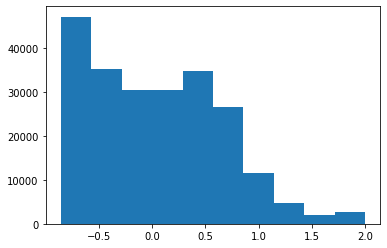

In [20]:
from matplotlib.pyplot import hist

hist(X_train[:,1])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


clf = LogisticRegression(max_iter = 1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.78      0.86      0.82     16456
         1.0       0.67      0.53      0.59      8544

    accuracy                           0.75     25000
   macro avg       0.72      0.70      0.71     25000
weighted avg       0.74      0.75      0.74     25000



In [25]:
ws = []
losses = []

#Gridsearch for lambda_
lambdas_ = [0.0001,0.001,0.01, 0.05,0.1, 0.2, 0.5, 1]
for l in lambdas_:
    w, loss = ridge_regression(y_train, X_train, l)
    ws.append(w)
    losses.append(loss)


In [30]:
ws[-1].shape

(30,)

In [35]:
clf.coef_[0].shape

(30,)

In [36]:
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Treat test day the same way we treat traim
_, tX_test, _, _ = preprocess(tX, tX_test)

weights = clf.coef_[0]
y_pred = predict_labels(weights, tX_test,1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

# Separated

In [ ]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

ids_test_sub_0, y_pred_0  = run_single_group(tX, y, tX_test, ids_test, 0)
ids_all, preds_all = run_all_groups()

In [ ]:
OUTPUT_PATH = './../results/predictions/divide_oct13.csv'
create_csv_submission(ids_all, preds_all,OUTPUT_PATH)